In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargue de la base de datos completa de PQR
import gdown

file_id = "1epim4eJN21gHgqKLtmYrxLi4wuGZGzyv"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "pqr.csv", quiet=False)

df = pd.read_csv("pqr.csv", sep=";")
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1epim4eJN21gHgqKLtmYrxLi4wuGZGzyv
From (redirected): https://drive.google.com/uc?id=1epim4eJN21gHgqKLtmYrxLi4wuGZGzyv&confirm=t&uuid=d3865515-57bc-4183-8cc3-c1d16b0fbde5
To: /content/pqr.csv
100%|██████████| 182M/182M [00:02<00:00, 84.4MB/s]


,OID_,A¥O,MES,PQR_CANAL,PET_COD_DEPTO,PET_COD_MPIO,ID_AFEC,AFEC_PARENTESCO,AFEC_GENERO,AFEC_EDADR,...,MACROMOTIVO,COD_MOTGEN,MOTIVO_GENERAL,COD_MOTESP,MOTIVO_ESPECIFICO,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10,RIESGO_VIDA,ALTO_COSTO
0,4,2021,1,Telefonico,68.0,68276.0,US- 000001949695,Otro,Hombre,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10302,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES RENALES,"IRC, ENFERMEDAD RENAL",ENFERMEDAD RENAL CRONICA,SI,DIALISIS PERITONEAL
1,13,2021,7,Telefonico,68.0,68276.0,US- 000001949698,Hijo (A),Hombre,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,ENFERMEDADES CRONICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSION ARTERIAL),"DOLOR EN EL PECHO, NO ESPECIFICADO",SI,NO APLICA
2,15,2021,2,Personalizado,63.0,63130.0,US- 000000931064,Nombre Propio,Hombre,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1040,RESTRICCION EN EL ACCESO POR NEGACION DE LA AU...,10402,NEGACION DE LA AUTORIZACION DE MEDICAMENTOS NO...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,CARDIOMIOPATIA ISQUMICA,SI,NO APLICA
3,34,2021,9,Telefonico,68.0,68001.0,US- 000001039632,Otro,Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10301,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,"OTRAS OSTEOPOROSIS, CON FRACTURA PATOLOGICA",NO,NO APLICA
4,66,2021,4,Web,76.0,76147.0,US- 000001066882,Nombre Propio,Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1010,RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNI...,10119,FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAME...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,EMBOLIA Y TROMBOSIS DE VENA NO ESPECIFICADA,NO,NO APLICA


In [4]:
#Corrección de la codificación
for col in df.select_dtypes(include="object").columns:
    df[col] = (
        df[col]
        .str.encode("latin1", errors="ignore")
        .str.decode("utf-8", errors="ignore")
    )

In [5]:
#Validación de los datos
print(df.head())
print(df.shape)

   OID_   A¥O  MES      PQR_CANAL  PET_COD_DEPTO  PET_COD_MPIO  \
0     4  2021    1     Telefonico           68.0       68276.0   
1    13  2021    7     Telefonico           68.0       68276.0   
2    15  2021    2  Personalizado           63.0       63130.0   
3    34  2021    9     Telefonico           68.0       68001.0   
4    66  2021    4            Web           76.0       76147.0   

            ID_AFEC AFEC_PARENTESCO AFEC_GENERO    AFEC_EDADR  ...  \
0  US- 000001949695            Otro      Hombre   DE 50 A 62   ...   
1  US- 000001949698        Hijo (A)      Hombre  MAYOR DE 63   ...   
2  US- 000000931064   Nombre Propio      Hombre   DE 50 A 62   ...   
3  US- 000001039632            Otro       Mujer  MAYOR DE 63   ...   
4  US- 000001066882   Nombre Propio       Mujer   DE 50 A 62   ...   

                                         MACROMOTIVO COD_MOTGEN  \
0  RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD       1030   
1  RESTRICCION EN EL ACCESO A LOS SERVICIOS DE S

In [6]:
#Convertir los nombres de las columnas a minúscula y reemplazar los espacios por guión bajo
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
#Se realizó la estandarización de los nombres de las variables, corrigiendo problemas de codificación y adoptando nombres descriptivos y consistentes.
df = df.rename(columns={
    "oid_": "id_registro",
    "a¥o": "anio",
    "mes": "mes",
    "pqr_canal": "canal_pqr",
    "pet_cod_depto": "cod_depto_peticion",
    "pet_cod_mpio": "cod_mpio_peticion",
    "id_afec": "id_afectado",
    "afec_parentesco": "parentesco_afectado",
    "afec_genero": "genero_afectado",
    "afec_edadr": "rango_edad_afectado",
    "afec_educ": "nivel_educativo_afectado",
    "afec_regafiliacion": "regimen_afiliacion_afectado",
    "afec_getnico": "grupo_etnico_afectado",
    "afec_pobespecial": "poblacion_especial_afectado",
    "afec_cod_depto": "cod_depto_afectado",
    "afec_cod_mpio": "cod_mpio_afectado",
    "ent_nombre": "nombre_entidad",
    "ent_tipovig_sns": "tipo_vigencia_sns",
    "ent_cod_sns": "codigo_sns_entidad",
    "ent_alias_sns": "alias_entidad"
})


In [8]:
#Validar nombre de las columnas
df.columns

Index(['id_registro', 'anio', 'mes', 'canal_pqr', 'cod_depto_peticion',
       'cod_mpio_peticion', 'id_afectado', 'parentesco_afectado',
       'genero_afectado', 'rango_edad_afectado', 'nivel_educativo_afectado',
       'regimen_afiliacion_afectado', 'grupo_etnico_afectado',
       'poblacion_especial_afectado', 'cod_depto_afectado',
       'cod_mpio_afectado', 'nombre_entidad', 'tipo_vigencia_sns',
       'codigo_sns_entidad', 'alias_entidad', 'ent_cod_depto', 'ent_cod_mpio',
       'cod_macromot', 'macromotivo', 'cod_motgen', 'motivo_general',
       'cod_motesp', 'motivo_especifico', 'patologia_1', 'patologia_tipo',
       'cie_10', 'riesgo_vida', 'alto_costo'],
      dtype='object')

Se realiza la limpieza de los datos, eliminando las columnas que no son necesarias y agregando una categoría para los datos faltantes

In [9]:
#Filtrar la base solamente por el departamento de Cundinamarca
df_cundinamarca = df[df["cod_depto_peticion"] == 25]


In [10]:
#Información de la base seleccionada
df_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12173 entries, 13 to 328931
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_registro                  12173 non-null  int64  
 1   anio                         12173 non-null  int64  
 2   mes                          12173 non-null  int64  
 3   canal_pqr                    12173 non-null  object 
 4   cod_depto_peticion           12173 non-null  float64
 5   cod_mpio_peticion            12173 non-null  float64
 6   id_afectado                  12173 non-null  object 
 7   parentesco_afectado          12173 non-null  object 
 8   genero_afectado              12173 non-null  object 
 9   rango_edad_afectado          12173 non-null  object 
 10  nivel_educativo_afectado     12173 non-null  object 
 11  regimen_afiliacion_afectado  12173 non-null  object 
 12  grupo_etnico_afectado        12173 non-null  object 
 13  poblacion_especial_

In [11]:
#Cantidad de filas y columnas
df_cundinamarca.shape

(12173, 33)

In [12]:
#Descripción estadística de la información
df_cundinamarca.describe()

,id_registro,anio,mes,cod_depto_peticion,cod_mpio_peticion,cod_depto_afectado,cod_mpio_afectado,ent_cod_depto,ent_cod_mpio,cod_macromot,cod_motgen,cod_motesp
count,1.217300e+04,12173.000000,12173.000000,12173.0,12173.000000,12170.000000,12170.000000,12173.000000,12173.000000,12173.000000,12173.000000,12173.000000
mean,5.067160e+05,2021.926477,5.889920,25.0,25496.876694,24.925637,25411.249219,23.174485,23581.565103,1.026534,1043.582519,10452.023084
std,3.221194e+05,0.741099,3.428181,0.0,261.808901,3.502575,3534.848453,7.077370,7197.994955,0.433219,433.118565,4330.293842
min,4.000000e+01,2021.000000,1.000000,25.0,25001.000000,5.000000,5001.000000,5.000000,5001.000000,1.000000,1010.000000,10119.000000
25%,2.464180e+05,2021.000000,3.000000,25.0,25286.000000,25.000000,25286.000000,25.000000,25175.000000,1.000000,1010.000000,10119.000000
50%,4.728030e+05,2022.000000,5.000000,25.0,25430.000000,25.000000,25430.000000,25.000000,25317.000000,1.000000,1010.000000,10120.000000
75%,7.273480e+05,2022.000000,9.000000,25.0,25754.000000,25.000000,25754.000000,25.000000,25754.000000,1.000000,1030.000000,10301.000000
max,1.246682e+06,2023.000000,12.000000,25.0,25899.000000,91.000000,91001.000000,91.000000,91001.000000,10.000000,10020.000000,100203.000000


In [13]:
#Validación de duplicados
df_cundinamarca.duplicated().sum()
df_cundinamarca[df_cundinamarca.duplicated()]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo


In [14]:
#Revisión de valores nulos
df_cundinamarca.isnull().sum()

,0
id_registro,0
anio,0
mes,0
canal_pqr,0
cod_depto_peticion,0
cod_mpio_peticion,0
id_afectado,0
parentesco_afectado,0
genero_afectado,0
rango_edad_afectado,0


In [15]:
#Revisar valores nulos en código de departamento
df_cundinamarca[df_cundinamarca["cod_depto_afectado"].isnull() | (df_cundinamarca["cod_depto_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo
2285,20194,2021,1,Escrito,25.0,25899.0,US- 000001998267,Hijo (A),Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10319,DEMORA DE LA AUTORIZACION DE INSUMOS POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES RESPIRA...,NEUMONIA,CORONAVIRUS COMO CAUSA DE ENFERMEDADES CLASIFI...,SI,NO APLICA
89231,786570,2021,4,Telefonico,25.0,25758.0,US- 000001995196,Hijo (A),Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10301,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,SINDROME DEL COLON IRRITABLE,NO,NO APLICA
112944,987084,2021,1,Web,25.0,25754.0,US- 000001806473,Madre,Hombre,DE 6 A 12,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10302,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,OTRAS ATENCIONES MEDICAS ESPECIFICADAS,NO,NO APLICA


In [16]:
#Revisar valores nulos en código de municipio
df_cundinamarca[df_cundinamarca["cod_mpio_afectado"].isnull() | (df_cundinamarca["cod_mpio_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo
2285,20194,2021,1,Escrito,25.0,25899.0,US- 000001998267,Hijo (A),Mujer,MAYOR DE 63,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10319,DEMORA DE LA AUTORIZACION DE INSUMOS POS,ENFERMEDADES CRONICAS NO TRANSMISIBLES RESPIRA...,NEUMONIA,CORONAVIRUS COMO CAUSA DE ENFERMEDADES CLASIFI...,SI,NO APLICA
89231,786570,2021,4,Telefonico,25.0,25758.0,US- 000001995196,Hijo (A),Mujer,DE 50 A 62,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10301,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,SINDROME DEL COLON IRRITABLE,NO,NO APLICA
112944,987084,2021,1,Web,25.0,25754.0,US- 000001806473,Madre,Hombre,DE 6 A 12,...,RESTRICCION EN EL ACCESO A LOS SERVICIOS DE SALUD,1030,RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUT...,10302,DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,OTRAS ATENCIONES MEDICAS ESPECIFICADAS,NO,NO APLICA


In [17]:
#Reemplazar valores nulos con 0
df_cundinamarca["cod_depto_afectado"] = df_cundinamarca["cod_depto_afectado"].fillna(0)
df_cundinamarca["cod_mpio_afectado"] = df_cundinamarca["cod_mpio_afectado"].fillna(0)

/tmp/ipython-input-3749357366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cundinamarca["cod_depto_afectado"] = df_cundinamarca["cod_depto_afectado"].fillna(0)
/tmp/ipython-input-3749357366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cundinamarca["cod_mpio_afectado"] = df_cundinamarca["cod_mpio_afectado"].fillna(0)


In [18]:
#Revisión valores nulos
df_cundinamarca[df_cundinamarca["cod_mpio_afectado"].isnull() | (df_cundinamarca["cod_mpio_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo


In [19]:
#Revisión valores nulos
df_cundinamarca[df_cundinamarca["cod_depto_afectado"].isnull() | (df_cundinamarca["cod_depto_afectado"] == "")]

,id_registro,anio,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,rango_edad_afectado,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,riesgo_vida,alto_costo


In [20]:
df_cundinamarca["riesgo_vida"].value_counts()

,count
riesgo_vida,
NO,7759
SI,4414


In [21]:
df_cundinamarca["riesgo_vida"].value_counts(normalize=True)

,proportion
riesgo_vida,
NO,0.637394
SI,0.362606


In [22]:
df_cundinamarca["canal_pqr"].value_counts()

,count
canal_pqr,
Web,5195
Telefonico,3583
Personalizado,1529
Escrito,887
Chat,412
Redes Sociales,287
Correo,266
Evento,14


In [23]:
df_cundinamarca["genero_afectado"].value_counts(normalize=True) * 100

,proportion
genero_afectado,
Mujer,57.808264
Hombre,42.191736


In [24]:
df_cundinamarca["rango_edad_afectado"].value_counts(normalize=True) * 100

,proportion
rango_edad_afectado,
MAYOR DE 63,49.675511
DE 50 A 62,21.095868
DE 38 A 49,11.624086
DE 30 A 37,5.347901
DE 6 A 12,3.343465
DE 18 A 24,2.973794
DE 25 A 29,2.480900
DE 13 A 17,2.045511
DE 0 A 5,1.412963


In [26]:
df_cundinamarca.isnull().sum()

,0
id_registro,0
anio,0
mes,0
canal_pqr,0
cod_depto_peticion,0
cod_mpio_peticion,0
id_afectado,0
parentesco_afectado,0
genero_afectado,0
rango_edad_afectado,0


**Análisis descriptivo y diagnóstico**

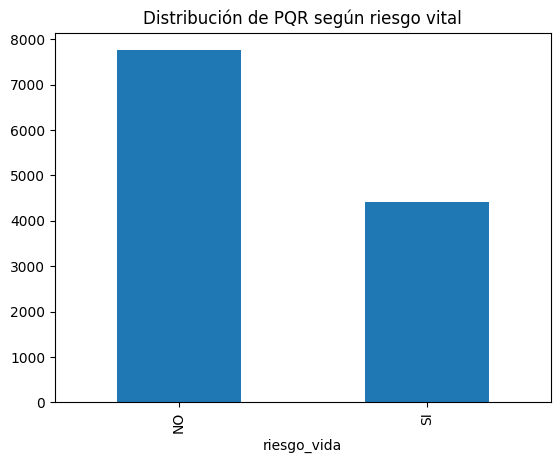

In [27]:
#Análisis univariado
df_cundinamarca["riesgo_vida"].value_counts().plot(kind="bar")
plt.title("Distribución de PQR según riesgo vital")
plt.show()

<Axes: title={'center': 'Distribución por rango de edad afectado'}, ylabel='count'>

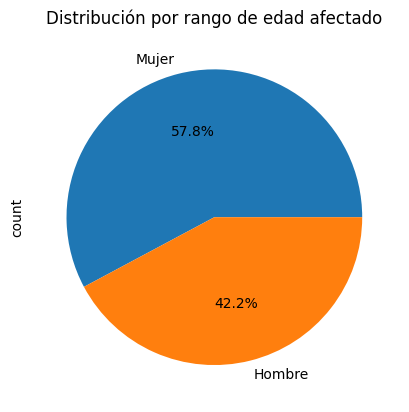

In [28]:
df_cundinamarca["genero_afectado"].describe()
df_cundinamarca["genero_afectado"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Distribución por rango de edad afectado"
)

<Axes: title={'center': 'Top 10 PQR según el canal'}, ylabel='canal_pqr'>

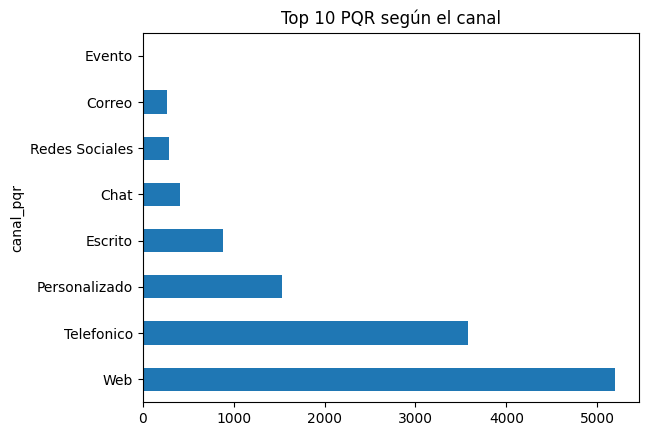

In [29]:
df_cundinamarca["canal_pqr"].value_counts().head(10).plot(
    kind="barh", title="Top 10 PQR según el canal"
)

In [30]:
#Se filtraron únicamente los registros correspondientes a enfermedades crónicas no transmisibles, dado que estas requieren tratamiento farmacológico continuo y presentan mayor impacto en el riesgo vital.
patologias_ecnt = [
    "DIABETES",
    "HTA (HIPERTENSION ARTERIAL)",
    "EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, BRONQUITIS CRONICA O ENFISEMA)",
    "ENFERMEDAD ISQUMICA CORONARIA",
    "ICC (INSUFICIENCIA CARDIACA CONGESTIVA)",
    "IRC, ENFERMEDAD RENAL",
    "IRC, TRASPLANTE",
    "OBESIDAD",
    "SOBREPESO",
    "ACV (ACCIDENTE CEREBRO VASCULAR)",
    "ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGIA"
]
df_cundinamarca = df[
    df["patologia_tipo"].isin(patologias_ecnt)
].copy()



In [31]:
df_cundinamarca["patologia_tipo"].value_counts(normalize=True) * 100

,proportion
patologia_tipo,
HTA (HIPERTENSION ARTERIAL),49.434054
DIABETES,29.753535
"EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, BRONQUITIS CRONICA O ENFISEMA)",7.366792
"IRC, ENFERMEDAD RENAL",4.045764
ACV (ACCIDENTE CEREBRO VASCULAR),3.542928
OBESIDAD,2.444288
ICC (INSUFICIENCIA CARDIACA CONGESTIVA),1.553975
"IRC, TRASPLANTE",1.316468
ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGIA,0.460764


<Axes: title={'center': 'Top 10 de patologías'}, ylabel='patologia_tipo'>

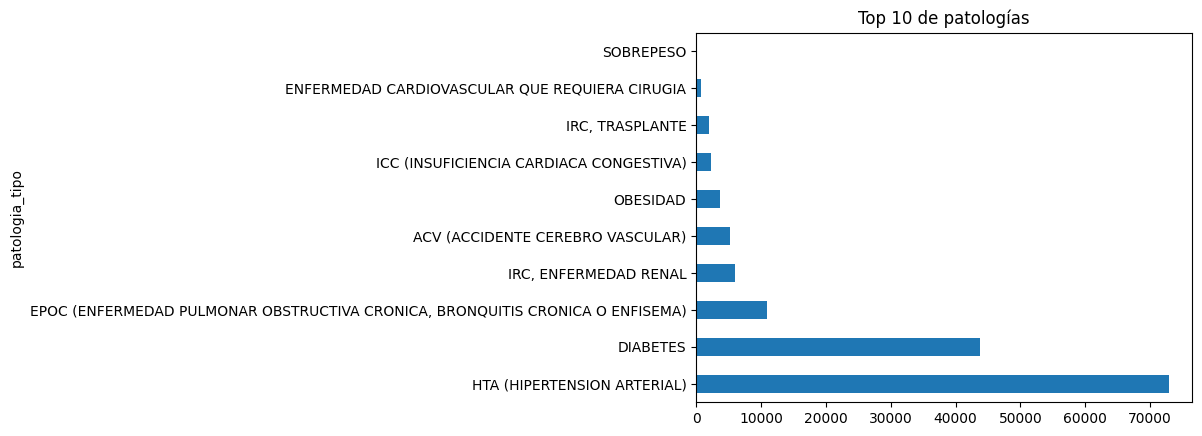

In [32]:
df_cundinamarca["patologia_tipo"].value_counts().head(10).plot(
    kind='barh', title="Top 10 de patologías"
)

In [33]:
df_cundinamarca['motivo_especifico'].value_counts()


,count
motivo_especifico,
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS POS,77728
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS NO POS,27744
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,10598
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,10207
DEMORA DE LA AUTORIZACION DE INSUMOS NO-POS,5901
DEMORA DE LA AUTORIZACION DE INSUMOS POS,4770
FALTA DE OPORTUNIDAD POR FRACCIONAMIENTO O ENTREGA INCOMPLETA DE LOS MEDICAMENTOS,2495
NEGACION PARA LA ENTREGA DE MEDICAMENTOS POS,1729
NEGACION PARA LA ENTREGA DE MEDICAMENTOS NO POS,1213


In [34]:
#Se identificaron los motivos específicos asociados a fallas en la entrega y autorización de medicamentos, los cuales fueron utilizados para construir la variable objetivo.
motivos_falla_medicamentos = [
    'FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS POS',
    'FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS NO POS',
    'DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS',
    'DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS',
    'FALTA DE OPORTUNIDAD POR FRACCIONAMIENTO O ENTREGA INCOMPLETA DE LOS MEDICAMENTOS',
    'NEGACION PARA LA ENTREGA DE MEDICAMENTOS POS',
    'NEGACION PARA LA ENTREGA DE MEDICAMENTOS NO POS',
    'NEGACION DE LA AUTORIZACION DE MEDICAMENTOS POS',
    'NEGACION DE LA AUTORIZACION DE MEDICAMENTOS NO-POS',
    'DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS PARA ENFERMEDADES RARAS O HUERFANAS',
    'FALTA DE CONTRATACION PARA LA ENTREGA OPORTUNA Y CONTINUA DE MEDICAMENTOS DE ALTO COSTO'
]


In [35]:
df_cundinamarca = df_cundinamarca[
    df_cundinamarca["motivo_especifico"].isin(motivos_falla_medicamentos)
].copy()


In [36]:
df_cundinamarca['motivo_especifico'].value_counts()

,count
motivo_especifico,
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS POS,77728
FALTA DE OPORTUNIDAD EN LA ENTREGA DE MEDICAMENTOS NO POS,27744
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS NO-POS,10598
DEMORA DE LA AUTORIZACION DE MEDICAMENTOS POS,10207
FALTA DE OPORTUNIDAD POR FRACCIONAMIENTO O ENTREGA INCOMPLETA DE LOS MEDICAMENTOS,2495
NEGACION PARA LA ENTREGA DE MEDICAMENTOS POS,1729
NEGACION PARA LA ENTREGA DE MEDICAMENTOS NO POS,1213
NEGACION DE LA AUTORIZACION DE MEDICAMENTOS POS,493
FALTA DE CONTRATACION PARA LA ENTREGA OPORTUNA Y CONTINUA DE MEDICAMENTOS DE ALTO COSTO,360


In [37]:
def clasificar_tipo_falla(motivo):
    if "FALTA DE OPORTUNIDAD" in motivo or "FRACCIONAMIENTO" in motivo:
        return "Falta de oportunidad en entrega"
    if "FRACCIONAMIENTO" in motivo:
        return "Falta de meidcamentos y entrega incompleta"
    elif "DEMORA DE LA AUTORIZACION" in motivo:
        return "Demora en autorización"
    elif "NEGACION DE LA AUTORIZACION" in motivo:
        return "Negación de autorización"
    elif "NEGACION PARA LA ENTREGA" in motivo:
        return "Negación de entrega"
    elif "ALTO COSTO" in motivo or "RARAS O HUERFANAS" in motivo:
        return "Alto costo"
    else:
        return "Otro"


df_cundinamarca["tipo_falla"] = df_cundinamarca["motivo_especifico"].apply(clasificar_tipo_falla)



In [38]:
df_cundinamarca['tipo_falla'].value_counts()

,count
tipo_falla,
Falta de oportunidad en entrega,107967
Demora en autorización,20814
Negación de entrega,2942
Negación de autorización,787
Alto costo,360


In [39]:
from google.colab import drive
drive.mount('/content/drive')

df_cundinamarca.to_csv(
    "/content/drive/MyDrive/Analitica/base_cundinamarca.csv",
    index=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
